<a href="https://colab.research.google.com/github/FarahRadwan/MachineLearning/blob/main/Regression_finall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings("ignore")

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()

In [45]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [47]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(df)
#y_scaled=scaler.fit_transform(y)

In [48]:
#Dividing data into train,test,validation
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25) #0.8*0.25=0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (303, 13)
X_test shape: (102, 13)
y_train shape: (303,)
y_test shape: (102,)
X_val shape: (303,)
y val shape: (102,)


In [49]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print("RMSE of Linear Regression without Regularization",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
acc=lm.score(X_test,y_test)
print("Accuracy_score:",acc)
r2 = r2_score(y_test, predictions)
predictions_val=lm.predict(X_val)
print("RMSE of Linear Regression without Regularization Validation",np.sqrt(metrics.mean_squared_error(y_val,predictions_val)))
acc_val=lm.score(X_val,y_val)
print("Accuracy_score Validation:",acc_val)


RMSE of Linear Regression without Regularization 4.770342910090356
Accuracy_score: 0.6953999259193504
RMSE of Linear Regression without Regularization Validation 4.449399134284692
Accuracy_score Validation: 0.7627037567566612


In [50]:
#To get the best degree without regularization
err_val=[]
deg=[]
err_train=[]
score_val=[]
score_train=[]
errval=[]
errtrain=[]
for i in range(10):
    x=i+1
    deg.append(x)
    poly = PolynomialFeatures(degree = x)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.fit_transform(X_val)
    pol=linear_model.LinearRegression()
    pol.fit(X_poly, y_train) 
    y_pred=pol.predict(x_poly_val)
    scre_val=pol.score(x_poly_val,y_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    score_val.append(scre_val)
    y_train_pred=pol.predict(X_poly)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)
    scre_train=pol.score(X_poly,y_train)

In [51]:
best_degree=deg[np.argmin(err_val)]
print("Degree of the polynomial is",best_degree)
print("RMSE without Regularization on validation",np.min(err_val))
print("score without regularization on validation",np.max(score_val)*100)

Degree of the polynomial is 2
RMSE without Regularization on validation 3.6801500493218335
score without regularization on validation 83.7662376663432


In [52]:
# get accuracy of best degree on test set without regularization
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.fit_transform(X_test)
pol=linear_model.LinearRegression()
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
score_noregul=pol.score(x_poly_test,y_test)
mean_error_noregul=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score of the best degree on test:",score_noregul*100)
print("Error of the best degree on test set:",mean_error_noregul)

score of the best degree on test: 85.23743552660862
Error of the best degree on test set: 3.320974189082425


In [53]:
#Lasso regularization with the best degree obtained
err_val=[]
deg=[]
err_train=[]
alpha=[]
errval=[]
errtrain=[]
scr_val=[]
scr_train=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20,100,500,1000]
for i in lambdas:
    alpha.append(i)
    poly = PolynomialFeatures(degree = best_degree)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.fit_transform(X_val)
    pol=linear_model.Lasso(alpha=i)
    pol.fit(X_poly, y_train) 
    scrval=pol.score(x_poly_val,y_val)
    scr_val.append(scrval)
    errval.append(1-scrval)
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    scrtrain=pol.score(X_poly,y_train)
    scr_train.append(scrtrain)
    errtrain.append(1-scrtrain)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)

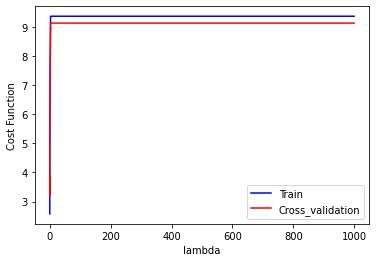

In [54]:
fig, ax = plt.subplots()
ax.plot(alpha, err_train, '-b', label='Train')
ax.plot(alpha, err_val, '-r', label='Cross_validation')
plt.xlabel("lambda")
plt.ylabel("Cost Function")
leg = ax.legend();

In [55]:
best=lambdas[np.argmin(err_val)]
best

0.01

In [56]:
err_val

[3.8183927852419988,
 3.1926618074973265,
 3.3556485219507195,
 3.536806684461269,
 4.075309003950457,
 4.452916054733484,
 5.014208666622905,
 6.503397560235317,
 9.13458255292913,
 9.13458255292913,
 9.13458255292913,
 9.13458255292913,
 9.13458255292913,
 9.13458255292913,
 9.13458255292913]

In [57]:
err_train

[2.5742558844735255,
 3.404033889102977,
 3.7879735932832874,
 4.2902653442247605,
 4.802996143242225,
 5.187804530464472,
 5.645372754513494,
 6.8221606820518765,
 9.369962434057095,
 9.369962434057095,
 9.369962434057095,
 9.369962434057095,
 9.369962434057095,
 9.369962434057095,
 9.369962434057095]

In [58]:
diff_lasso=[]
for i in range (len(err_train)):
    diff_lasso.append(np.abs(err_val[i]-err_train[i]))
    

In [59]:
diff_lasso 

[1.2441369007684733,
 0.21137208160565057,
 0.4323250713325679,
 0.7534586597634916,
 0.7276871392917679,
 0.7348884757309886,
 0.6311640878905891,
 0.3187631218165592,
 0.23537988112796526,
 0.23537988112796526,
 0.23537988112796526,
 0.23537988112796526,
 0.23537988112796526,
 0.23537988112796526,
 0.23537988112796526]

In [60]:
#Test with lasso regularizaton with best_degree
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.fit_transform(X_test)
pol=linear_model.Lasso(alpha=best)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_lasso=pol.score(x_poly_test,y_test)
mean_error_test_lasso=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score_lasso",ypred_lasso*100)
print("error_lasso",mean_error_test_lasso)

score_lasso 85.8886138331612
error_lasso 3.2469039009441008


In [61]:
#Ridge regularization with the best degree obtained
err_val=[]
deg=[]
err_train=[]
alpha=[]
errval=[]
errtrain=[]
scr_val=[]
scr_train=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20]
for i in lambdas:
    alpha.append(i)
    poly = PolynomialFeatures(degree = best_degree)
    X_poly = poly.fit_transform(X_train)
    x_poly_val=poly.fit_transform(X_val)
    pol=linear_model.Ridge(alpha=i)
    pol.fit(X_poly, y_train) 
    scrval=pol.score(x_poly_val,y_val)
    scr_val.append(scrval)
    errval.append(1-scrval)
    y_pred=pol.predict(x_poly_val)
    mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
    err_val.append(mean_error)
    y_train_pred=pol.predict(X_poly)
    scrtrain=pol.score(X_poly,y_train)
    scr_train.append(scrtrain)
    errtrain.append(1-scrtrain)
    mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    err_train.append(mean_error_train)

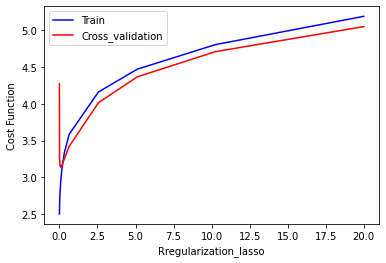

In [62]:
fig, ax = plt.subplots()
ax.plot(alpha, err_train, '-b', label='Train')
ax.plot(alpha, err_val, '-r', label='Cross_validation')
plt.xlabel("Rregularization_lasso")
plt.ylabel("Cost Function")
leg = ax.legend();

In [63]:
best_ridge=lambdas[np.argmin(err_val)]
best_ridge

0.08

In [64]:
err_val

[4.274767896836138,
 3.2487618197777652,
 3.2130463896474986,
 3.163612449573794,
 3.1399869222261922,
 3.1638115084118654,
 3.2507637675842513,
 3.4221742707426985,
 4.015771197026585,
 4.368792685456656,
 4.710497782229043,
 5.051628434396169]

In [65]:
err_train

[2.503237166797193,
 2.6045602763910463,
 2.684407483813072,
 2.7897546891852145,
 2.928504537512911,
 3.108813970981139,
 3.33155023416277,
 3.5870296234626617,
 4.161821673886913,
 4.472942228679042,
 4.8059735345831065,
 5.191166437099858]

In [66]:
#Test with lasso regularizaton with best_degree
poly = PolynomialFeatures(degree = best_degree)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.fit_transform(X_test)
pol=linear_model.Ridge(alpha=best_ridge)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_ridge=pol.score(x_poly_test,y_test)
mean_error_test_ridge=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred_ridge*100)
print("error",mean_error_test_ridge)

score 87.73126910738553
error 3.027501847567982


In [67]:
print("Error without Regularization:",mean_error_noregul)
print("score without Regularization:",score_noregul*100)
print("Error with Lasso:",mean_error_test_lasso)
print("score with Lasso:",ypred_lasso*100)
print("Error with Ridge:",mean_error_test_ridge)
print("score with Ridge:",ypred_ridge*100)


Error without Regularization: 3.320974189082425
score without Regularization: 85.23743552660862
Error with Lasso: 3.2469039009441008
score with Lasso: 85.8886138331612
Error with Ridge: 3.027501847567982
score with Ridge: 87.73126910738553


0
1
2
3
4
5
6
7
8
9


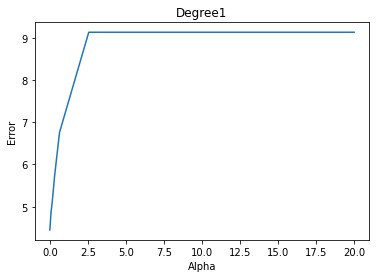

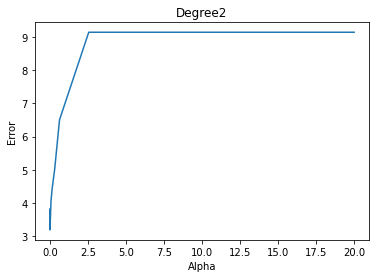

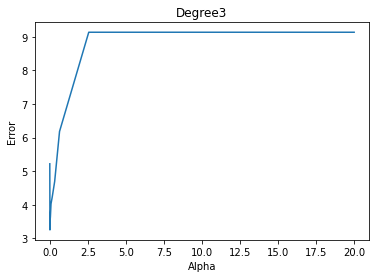

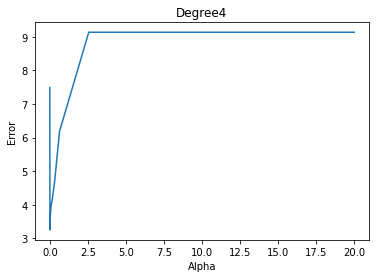

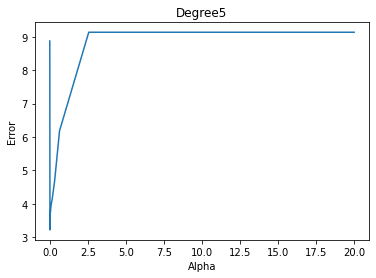

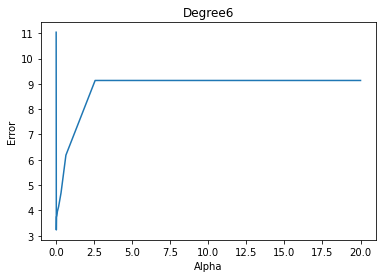

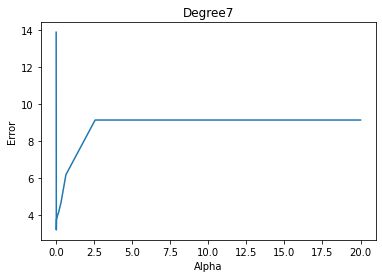

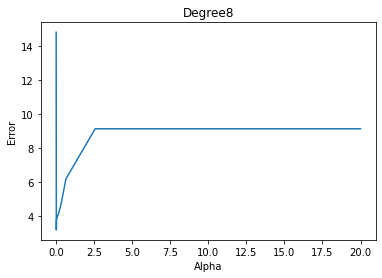

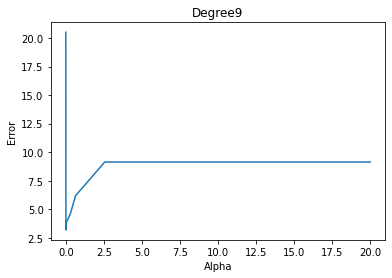

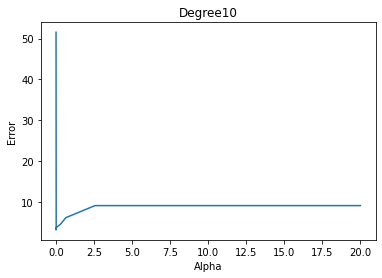

In [68]:
#Lasso Regulurization with degrees 
min=[]
alpha=[]
deg=[]
best_degree_reg=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20]
for i in range (10):
    err_val=[]
    for j in lambdas :
     poly = PolynomialFeatures(degree = i+1)
     X_poly = poly.fit_transform(X_train)
     x_poly_val=poly.fit_transform(X_val)
     pol=linear_model.Lasso(alpha=j)
     pol.fit(X_poly, y_train) 
     y_pred=pol.predict(x_poly_val)
     mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
     err_val.append(mean_error)
     y_train_pred=pol.predict(X_poly)
     mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
     err_train.append(mean_error_train)
    print(i)
    plt.figure()
    plt.plot(lambdas,err_val)
    x="Degree"+str(i+1)
    plt.title(x)
    plt.xlabel("Alpha")
    plt.ylabel("Error")
    min.append(np.min(err_val))
    alpha.append(lambdas[np.argmin(err_val)])
    deg.append(i+1)
   

In [69]:
np.min(min)

3.1780048273814057

In [70]:
deg_lasso=deg[np.argmin(min)]
deg_lasso

8

In [71]:
lambda_lasso=alpha[np.argmin(min)]
lambda_lasso

0.01

In [72]:
#Test with lasso regularizaton with best_degree
poly = PolynomialFeatures(degree = deg_lasso)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.fit_transform(X_test)
pol=linear_model.Lasso(alpha=lambda_lasso)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred=pol.score(x_poly_test,y_test)
mean_error_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred*100)
print("error",mean_error_test)

score 87.96465604750902
error 2.9985676389768696


0
1
2
3
4
5
6
7
8
9


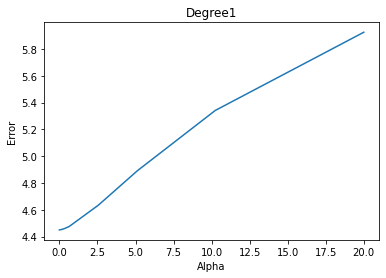

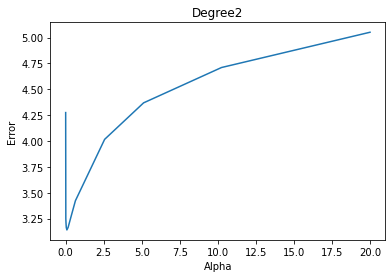

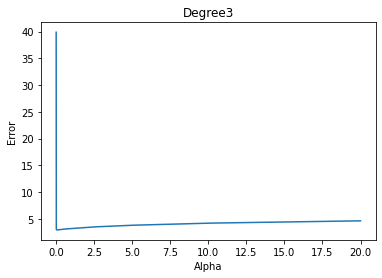

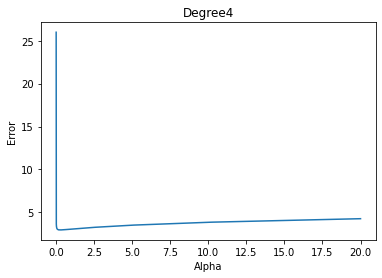

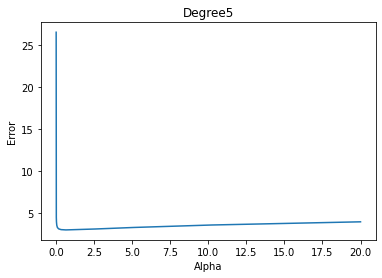

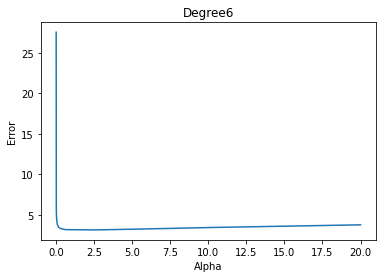

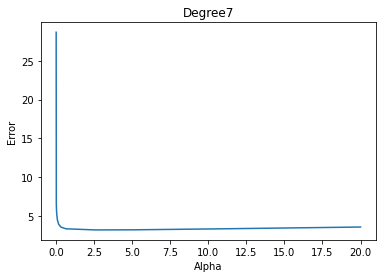

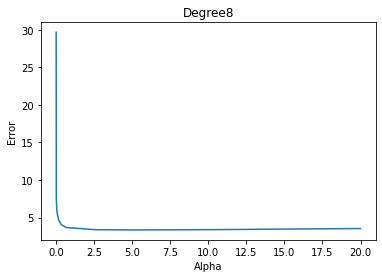

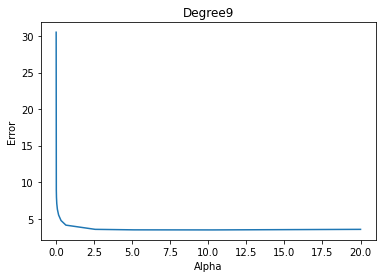

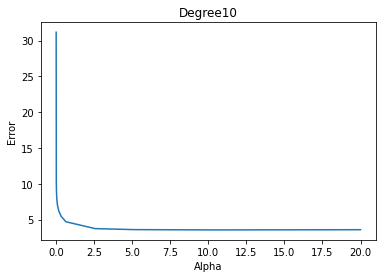

In [73]:
#Ridge Regulurization with degrees 
min=[]
alpha=[]
deg=[]
best_degree_reg=[]
lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,2.56,5.12,10.24,20]
for i in range (10):
    err_val=[]
    for j in lambdas :
     poly = PolynomialFeatures(degree = i+1)
     X_poly = poly.fit_transform(X_train)
     x_poly_val=poly.fit_transform(X_val)
     pol=linear_model.Ridge(alpha=j)
     pol.fit(X_poly, y_train) 
     y_pred=pol.predict(x_poly_val)
     mean_error=np.sqrt(metrics.mean_squared_error(y_val,y_pred))
     err_val.append(mean_error)
     y_train_pred=pol.predict(X_poly)
     mean_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
     err_train.append(mean_error_train)
    print(i)
    plt.figure()
    plt.plot(lambdas,err_val)
    x="Degree"+str(i+1)
    plt.title(x)
    plt.xlabel("Alpha")
    plt.ylabel("Error")
    min.append(np.min(err_val))
    alpha.append(lambdas[np.argmin(err_val)])
    deg.append(i+1)
   

In [74]:
np.min(min)

2.94144777017537

In [75]:
deg_ridge=deg[np.argmin(min)]
deg_ridge

3

In [76]:
lambda_ridge=alpha[np.argmin(min)]
lambda_ridge

0.08

In [77]:
#Test with Ridge regularizaton with best_degree
poly = PolynomialFeatures(degree = deg_ridge)
X_poly = poly.fit_transform(X_train)
x_poly_test=poly.fit_transform(X_test)
pol=linear_model.Ridge(alpha=lambda_ridge)
pol.fit(X_poly, y_train) 
y_pred=pol.predict(x_poly_test)
ypred_ridge_deg=pol.score(x_poly_test,y_test)
mean_error_test_ridge_deg=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("score",ypred_ridge_deg*100)
print("error",mean_error_test_ridge_deg)

score 88.63533495806396
error 2.913821319473846


In [78]:
#Testing linear_model with different paremeters
reg_coef = linear_model.LinearRegression().fit(X_train, y_train)
train_coeff=[]
val_coeff=[]
test_coeff=[]
for i in range(0, 100000):
    reg_coef.coef_= np.random.uniform(-10, 10,13)
    train_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_train), y_train)))
    val_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_val), y_val)))
    test_coeff.append(np.sqrt(metrics.mean_squared_error(reg_coef.predict(X_test), y_test)))

In [79]:
np.min(val_coeff)

5.680036636984616

In [80]:
np.min(train_coeff)

6.287190274624154

In [81]:
reg_coef.coef_

array([-1.25770106,  6.57307633,  3.0032981 ,  4.15898369, -1.55949739,
       -4.52858695,  9.18062576, -1.06495473, -0.53985361, -7.63318078,
       -2.1499269 ,  3.90149796, -7.50782842])

In [82]:
np.min(test_coeff)

5.254599562777502

In [83]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)))
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_val), y_val)))
print(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)))

4.863739049953664
4.449399134284692
4.770342910090356


In [84]:
#with using predefined function it produces the best paremeters and it is faster so using it instead of generating paremeters each time